# Tensorflow

Google tarafından geliştirilen açık kaynak kodlu kütüphanedir. Modelleri eğitme, oluşturma gibi başta gelen işlemleri yapmak için kullanılan bir kütüphanedir. 

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("/home/betul/DataMining/pandas-ml-tf-learning/house_prices.csv")

In [3]:
dataframe

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

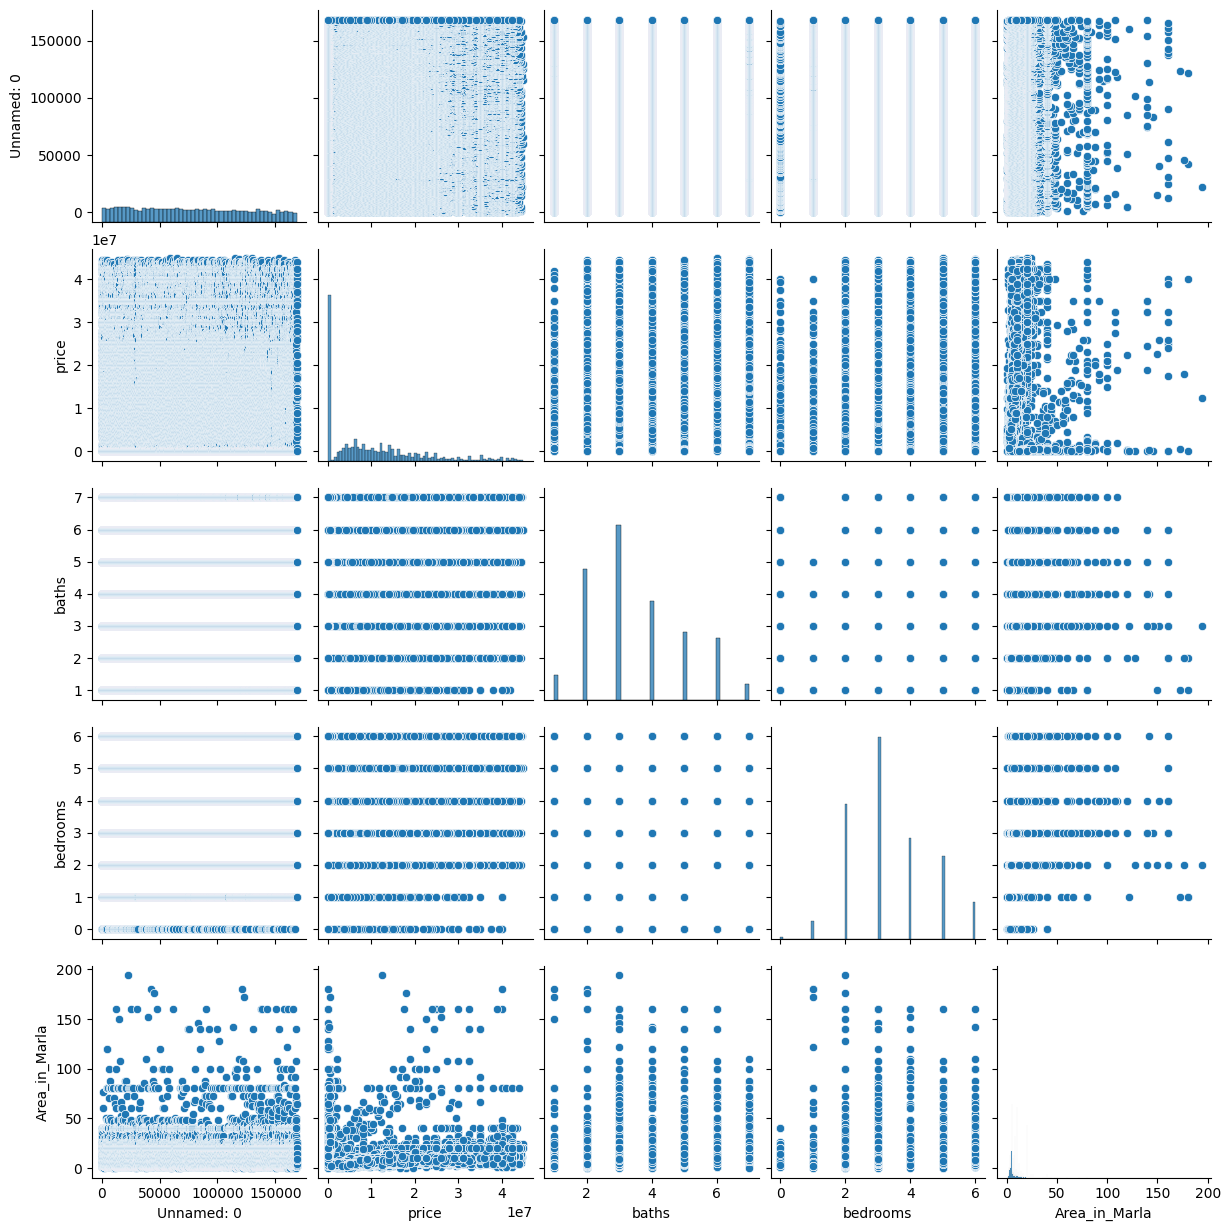

In [5]:
sbn.pairplot(dataframe)

# Veriyi Test/Train Ayırmak.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y = dataframe["price"].values

In [8]:
x = dataframe[["baths","bedrooms"]].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(79599, 2)

In [11]:
X_test.shape

(19900, 2)

In [12]:
import tensorflow as tf

2023-12-21 02:23:39.279571: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 02:23:39.330867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 02:23:39.330908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 02:23:39.332446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 02:23:39.342326: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 02:23:39.343173: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

2023-12-21 02:23:41.117565: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-21 02:23:41.118161: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
model

In [17]:
model.add(Dense(4, activation= "linear"))
model.add(Dense(4, activation= "linear"))
model.add(Dense(4, activation= "linear"))

model.add(Dense(1))

In [19]:
model.compile(optimizer="adam", loss="mse")

In [20]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2488/2488 [==============================] - 6s 2ms/step - loss: 218938692599808.0000
Epoch 2/10
2488/2488 [==============================] - 5s 2ms/step - loss: 191419394293760.0000
Epoch 3/10
2488/2488 [==============================] - 4s 2ms/step - loss: 126234130382848.0000
Epoch 4/10
2488/2488 [==============================] - 5s 2ms/step - loss: 90268325904384.0000
Epoch 5/10
2488/2488 [==============================] - 5s 2ms/step - loss: 88119114203136.0000
Epoch 6/10
2488/2488 [==============================] - 4s 2ms/step - loss: 87993385746432.0000
Epoch 7/10
2488/2488 [==============================] - 5s 2ms/step - loss: 87875282534400.0000
Epoch 8/10
2488/2488 [==============================] - 4s 2ms/step - loss: 87761088413696.0000
Epoch 9/10
2488/2488 [==============================] - 4s 2ms/step - loss: 87649394098176.0000
Epoch 10/10
2488/2488 [==============================] - 5s 2ms/step - loss: 87539302006784.0000


In [22]:
loss = model.history.history["loss"]

<Axes: >

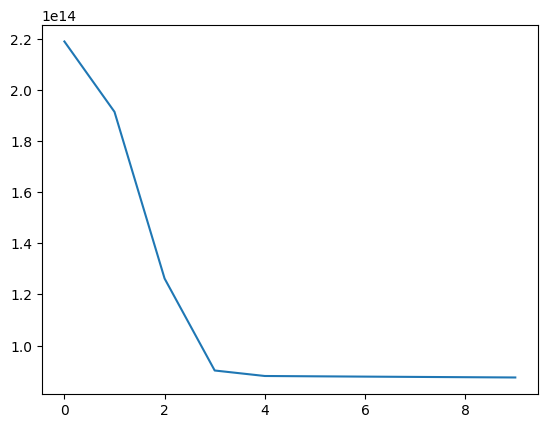

In [24]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [25]:
trainLoss = model.evaluate(X_train,y_train, verbose=0)
testLoss = model.evaluate(X_train,y_train, verbose=0)

In [26]:
trainLoss

87479667392512.0

In [27]:
testLoss

87479667392512.0

In [28]:
testGuests = model.predict(X_test)

622/622 [==============================] - 1s 1ms/step


In [29]:
testGuests

array([[ 9567444.],
       [ 6642501.],
       [ 6642501.],
       ...,
       [15417330.],
       [ 6642501.],
       [ 6642501.]], dtype=float32)

In [30]:
guestDf = pd.DataFrame(y_test, columns=["Real Y"])
guestDf["Test Y"] = testGuests

In [31]:
guestDf

,Real Y,Test Y
0,11500000,9567444.0
1,6500000,6642501.0
2,25000,6642501.0
3,12000000,12614216.0
4,22000000,15417330.0
...,...,...
19895,3900000,12492388.0
19896,35000,11090829.0
19897,14000000,15417330.0
19898,4200000,6642501.0


In [32]:
guestDf["Difference"] = guestDf["Real Y"] - guestDf["Test Y"]

In [33]:
guestDf

,Real Y,Test Y,Difference
0,11500000,9567444.0,1932556.0
1,6500000,6642501.0,-142501.0
2,25000,6642501.0,-6617501.0
3,12000000,12614216.0,-614216.0
4,22000000,15417330.0,6582670.0
...,...,...,...
19895,3900000,12492388.0,-8592388.0
19896,35000,11090829.0,-11055829.0
19897,14000000,15417330.0,-1417330.0
19898,4200000,6642501.0,-2442501.0


<Axes: xlabel='Real Y', ylabel='Test Y'>

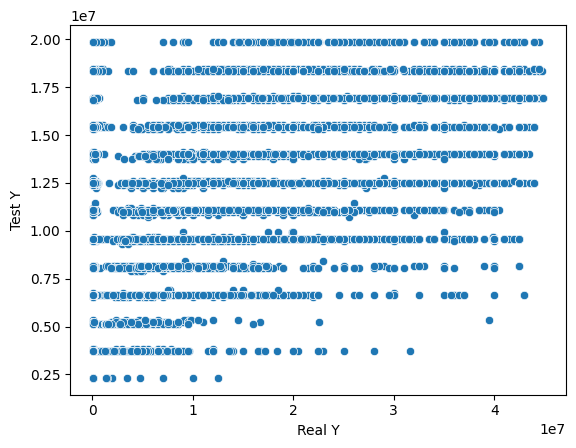

In [34]:
sbn.scatterplot(x="Real Y", y="Test Y",data=guestDf)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(guestDf["Real Y"],guestDf["Test Y"])

7169203.326105528

In [37]:
mean_squared_error(guestDf["Real Y"],guestDf["Test Y"])

88383102972253.19

In [38]:
dataframe.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


In [39]:
newHouse = [[4,5]]

In [40]:
model.predict(newHouse)

1/1 [==============================] - 0s 56ms/step


array([[13893944.]], dtype=float32)

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save("house_prediction.h5")

/home/betul/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
load =  load_model("house_prediction.h5")